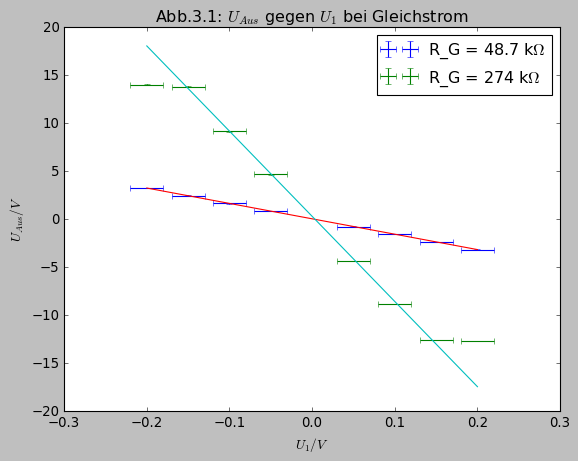

die Steigung:  16.03 +- 0.02
die Steigung:  88.7 +- 1.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.style as mlps
mlps.use('classic')
def linear(x, k, b):
    return x*k + b
U_1 = np.array([-0.2, -0.15, -0.1, -0.05, 0.05, 0.1, 0.15, 0.2])
U_A_48 = np.array([3.22, 2.43, 1.62, 0.83, -0.79, -1.58, -2.38, -3.19])   # R_G = 48.7 kOhm
U_A_274 = np.array([14., 13.8, 9.12, 4.64, -4.4, -8.88, -12.6, -12.7])     # R_G = 274 kOhm
fehler_U = np.full(len(U_1), 0.02)
popt48,pcov48 = curve_fit(linear, U_1, U_A_48)
popt274,pcov274 = curve_fit(linear, U_1[1:-1], U_A_274[1:-1])
plt.errorbar(U_1, U_A_48, xerr = fehler_U, yerr = fehler_U, linestyle = 'None', label = 'R_G = 48.7 k$\Omega$')
plt.errorbar(U_1, U_A_274, xerr = fehler_U, yerr = fehler_U, linestyle = 'None', label = 'R_G = 274 k$\Omega$')
plt.plot(U_1, linear(U_1, popt48[0], popt48[1]))
plt.plot(U_1, linear(U_1, popt274[0], popt274[1]))
plt.ylabel('$U_{Aus} / V$')
plt.xlabel('$U_{1} / V$')
plt.title('Abb.3.1: $U_{Aus}$ gegen $U_1$ bei Gleichstrom')
plt.legend(loc = 'best')
#plt.savefig('spannung.pdf',fmt = 'pdf', pixel=1000)
plt.show()
print('die Steigung: ', -popt48[0], '+-', round(np.sqrt(pcov48[0][0]),2))
print('die Steigung: ', round(-popt274[0],1), '+-', round(np.sqrt(pcov274[0][0]),1))

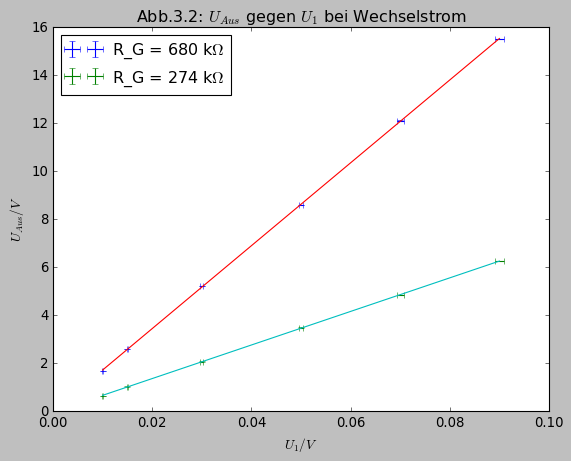

die Steigung:  172.68 +- 0.62
die Steigung:  69.94 +- 0.31


In [3]:
U_1 = np.array([0.1, 0.15, 0.3, 0.5, 0.7, 0.9]) / 10
fehler_U_1 = 0.01 * U_1
U_A_274 = np.array([0.62, 1.02, 2.06, 3.47, 4.84, 6.24])     # R_G = 274 kOhm
U_A_680 = np.array([1.66, 2.59, 5.21, 8.58, 12.1, 15.5])     # R_G = 680 kOhm
fehler_U = np.full(len(U_1), 0.01)
popt680,pcov680 = curve_fit(linear, U_1, U_A_680)
popt274,pcov274 = curve_fit(linear, U_1, U_A_274)
plt.errorbar(U_1, U_A_680, xerr = fehler_U_1, yerr = fehler_U, linestyle = 'None', label = 'R_G = 680 k$\Omega$')
plt.errorbar(U_1, U_A_274, xerr = fehler_U_1, yerr = fehler_U, linestyle = 'None', label = 'R_G = 274 k$\Omega$')
plt.plot(U_1, linear(U_1, popt680[0], popt680[1]))
plt.plot(U_1, linear(U_1, popt274[0], popt274[1]))
plt.ylabel('$U_{Aus} / V$')
plt.xlabel('$U_{1} / V$')
plt.title('Abb.3.2: $U_{Aus}$ gegen $U_1$ bei Wechselstrom')
plt.legend(loc = 'best')
plt.savefig('spannung2.pdf',fmt = 'pdf', pixel=1000)
plt.show()
print('die Steigung: ', round(popt680[0], 2), '+-', round(np.sqrt(pcov680[0][0]),2))
print('die Steigung: ', round(popt274[0],2), '+-', round(np.sqrt(pcov274[0][0]),2))

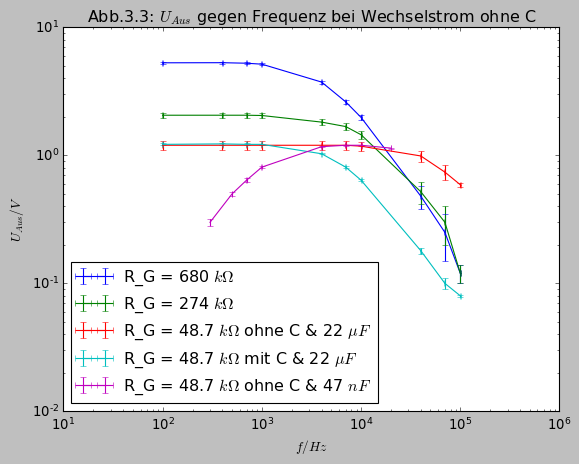

In [6]:
f = np.array([100, 400, 700, 1000, 4000, 7000, 10000, 40000, 70000, 100000])
fehler_f = f * 0.01
U_A_680 = np.array([5.29, 5.30, 5.25, 5.16, 3.74, 2.62, 1.98, 0.48, 0.25, 0.12])
fehler_U_A = np.full(len(U_A_680), 0.1)
fehler_U_A[-1] = 0.02
U_A_274 = np.array([2.06, 2.06, 2.06, 2.05, 1.82, 1.68, 1.45, 0.52, 0.30, 0.12])
U_A_48 = np.array([1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.18, 0.99, 0.74, 0.59])
U_A_mitC = np.array([1.22, 1.23, 1.22, 1.22, 1.03, 0.81, 0.64, 0.18, 0.10, 0.08])
fehler_U_A_mitC = np.array([0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01, 0.001])
U_A_mitC2 = np.array([0.3, 0.5, 0.64, 0.81, 1.17, 1.20, 1.20, 1.14])
fehler_U_A_mitC2 = np.array([0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01])
f2 = np.array([300, 500, 700, 1000, 4000, 7000, 10000, 20000])
fehler_f2 = f2 * 0.01
plt.errorbar(f, U_A_680, xerr = fehler_f, yerr = fehler_U_A,label = 'R_G = 680 $k\Omega$')
plt.errorbar(f, U_A_274, xerr = fehler_f, yerr = fehler_U_A, label = 'R_G = 274 $k\Omega$')
plt.errorbar(f, U_A_48, xerr = fehler_f, yerr = fehler_U_A, label = 'R_G = 48.7 $k\Omega$ ohne C & 22 $\mu F$')
plt.errorbar(f, U_A_mitC, xerr = fehler_f, yerr = fehler_U_A_mitC, label = 'R_G = 48.7 $k\Omega$ mit C & 22 $\mu F$')
plt.errorbar(f2, U_A_mitC2, xerr = fehler_f2, yerr = fehler_U_A_mitC2, label = 'R_G = 48.7 $k\Omega$ ohne C & 47 $nF$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$U_{Aus} / V$')
plt.xlabel('$f / Hz$')
#plt.ylim((0.02, 10))
plt.title('Abb.3.3: $U_{Aus}$ gegen Frequenz bei Wechselstrom ohne C')
plt.legend(loc = 'best')
#plt.savefig('spannung4.pdf',fmt = 'pdf', pixel=1000)
plt.show()